## **Microsoft Studio Movie Data Analysis**

## **Overview**
This project analyses two datasets to uncover patterns and trends that contribute to a movie's success. Primary focus revolves around two key findings: the influence of movie genres on profitability and the impact of film length on financial success.

## **Business Problem**
Microsoft company wants to open a movie studio. Inorder to be successful they would require data driven decisions in their movie production process in order to create popular and more importantly, profitable movies.

# **Datasets**
 This project analyses datasets encompassing a wide range of movies spanning various genres, release periods, and production scales. These datasets are rich in both historical and contemporary film information, providing a robust foundation for our analysis.

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

**BomMovie Dataset**

BomMovie dataset is comprised of records on 3387 movies and includes 5 columns. column of interest would be foreign gross.

In [45]:
# Read the CSV file
bom_movie = pd.read_csv('./Dataset/bom.movie_gross.csv')

# Display the first few rows
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [46]:
bom_movie.shape

(3387, 5)

Dropping unnecessary column in bom dataset

 `studio` it wont be needed for analysis
 `domestic_gross`: foreign_gross is picked over domestic 

In [47]:
bom_movieNew = bom_movie.drop(columns = ['studio','domestic_gross',])
bom_movieNew.head()

,title,foreign_gross,year
0,Toy Story 3,652000000,2010
1,Alice in Wonderland (2010),691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,664300000,2010
3,Inception,535700000,2010
4,Shrek Forever After,513900000,2010


**IMDB Dataset**

IMDB dataset is comprised of multiple tables containing various information about movies. The two tables of interest are: `movie_basics` and `movie_ratings`.

Look up for tables in the dataset

In [48]:
conn = sqlite3.connect('./Dataset/im.db')
query = """SELECT * FROM sqlite_master"""
pd.read_sql(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Retrieve tables of interest

Movie_rating table

In [49]:
query2 = """SELECT * FROM   MOVIE_RATINGS"""
ratings= pd.read_sql(query2, conn)
ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Dropping irrelevant columns 

`numvotes`: It wont be used in the analysis

In [50]:
ratings_Clean = ratings.drop(columns = ['numvotes'])
ratings_Clean.head(2)

,movie_id,averagerating
0,tt10356526,8.3
1,tt10384606,8.9


Movie_basic table

In [51]:
query3 = """SELECT * FROM movie_basics"""
movieBasics = pd.read_sql(query3, conn)
movieBasics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Dropping `original_title ` as there are two title columns.

In [52]:
movieBasics_Clean = movieBasics.drop(columns = ['original_title'])
movieBasics_Clean.head(2)

,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"


Merging both movie basic and movie rating column using a common column of movie_id

In [53]:
imbData = pd.merge(ratings_Clean, movieBasics_Clean, left_on = 'movie_id', right_on = 'movie_id')
imbData.head()

,movie_id,averagerating,primary_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,Até Onde?,2011,73.0,"Mystery,Thriller"


## Renaming column
Renaming imbData `primary_title` to `title`inorder to merge with bom_movieNew

In [54]:
imbData.rename(columns={'primary_title':'title'}, inplace = True)
imbData.head(1)

,movie_id,averagerating,title,start_year,runtime_minutes,genres
0,tt10356526,8.3,Laiye Je Yaarian,2019,117.0,Romance


Merging both movie basic and movie rating column using a common column of movie_id

In [55]:
Database = pd.merge(imbData, bom_movieNew, left_on='title', right_on='title', how='inner')
Database.head()

,movie_id,averagerating,title,start_year,runtime_minutes,genres,foreign_gross,year
0,tt1043726,4.2,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42400000,2014
1,tt1171222,5.1,Baggage Claim,2013,96.0,Comedy,887000,2013
2,tt1181840,7.0,Jack and the Cuckoo-Clock Heart,2013,94.0,"Adventure,Animation,Drama",3400000,2014
3,tt1210166,7.6,Moneyball,2011,133.0,"Biography,Drama,Sport",34600000,2011
4,tt1212419,6.5,Hereafter,2010,129.0,"Drama,Fantasy,Romance",72500000,2010


## Descriptive Analysis

Database Dataset

In [56]:
Database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   averagerating    3027 non-null   float64
 2   title            3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   foreign_gross    1832 non-null   object 
 7   year             3027 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 189.3+ KB


In [57]:
Database.describe()

,averagerating,start_year,runtime_minutes,year
count,3027.000000,3027.000000,2980.000000,3027.000000
mean,6.457582,2013.783284,107.217114,2014.077635
std,1.012277,2.466955,20.073886,2.442245
min,1.600000,2010.000000,3.000000,2010.000000
25%,5.900000,2012.000000,94.000000,2012.000000
50%,6.600000,2014.000000,105.000000,2014.000000
75%,7.100000,2016.000000,118.000000,2016.000000
max,9.200000,2019.000000,272.000000,2018.000000


### Changing foreign_gross column to numeric to do computations

In [58]:
# Convert 'foreign_gross' to numeric, coercing errors to NaN
Database['foreign_gross'] = pd.to_numeric(Database['foreign_gross'], errors='coerce')

In [59]:
# Divide the 'foreign_gross' column by a million for readability
Database['foreign_gross'] = Database['foreign_gross'] / 1_000_000

## **Visualizations**

## **Foreign gross by Genre**
A small dataframe dataframe of movies with at least a rating of 7.0 and grossed earnings of at least 27.9mil is crated then genre is split up so it's on its own. A bar graph is drawn to show which genre is most profitable. `Adventure` genre is most profitable genre.

In [60]:
# Creating a smaller dataframe of movies with at least a rating of 7.0 and grossed earnings of at least 27.9mil
Database_small = Database[(Database['averagerating'] >= 7) &
                        (Database['foreign_gross'] >= 27.9) &
                        (Database['start_year'] > 2012)]
                        
# We want to split the genre column for analysis, so that each genre is on its own
Database_small = Database_small.assign(genres = Database_small['genres'].str.split(',')).explode('genres')

### Bar graph of Foreign gross by Genre

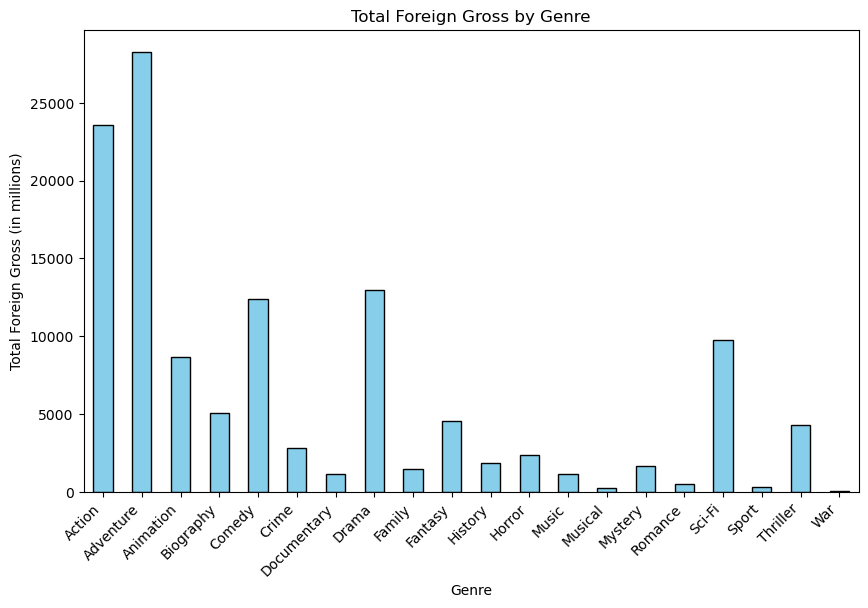

In [61]:
# Group by 'genres' and sum the 'foreign_gross' for each genre
genre_gross = Database_small.groupby('genres')['foreign_gross'].sum()

# Plot a bar graph
genre_gross.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Total Foreign Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Foreign Gross (in millions)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

## **Runtime_minutes of a movie by Average rating**
Runtime minutes will missing values are dropped then a condition is set to retrieve records with averagerating of `7`and runtime_minutes of less or equal to `300` then a histogram is used to show which movie length is more liked.

In [62]:
# Dropping missing values
imbDataNew = Database.dropna(subset=['runtime_minutes'])

In [63]:
# creating a datadframe
imbDataNew = Database[(Database['averagerating'] >= 7) & (Database['runtime_minutes'] <= 300)]
imbDataNew.head()

,movie_id,averagerating,title,start_year,runtime_minutes,genres,foreign_gross,year
2,tt1181840,7.0,Jack and the Cuckoo-Clock Heart,2013,94.0,"Adventure,Animation,Drama",3.4,2014
3,tt1210166,7.6,Moneyball,2011,133.0,"Biography,Drama,Sport",34.6,2011
5,tt1229238,7.4,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",485.3,2011
6,tt1232829,7.2,21 Jump Street,2012,109.0,"Action,Comedy,Crime",63.1,2012
13,tt1403981,7.1,Remember Me,2010,113.0,"Drama,Romance",37.0,2010


## **Histogram of runtime_minutes**

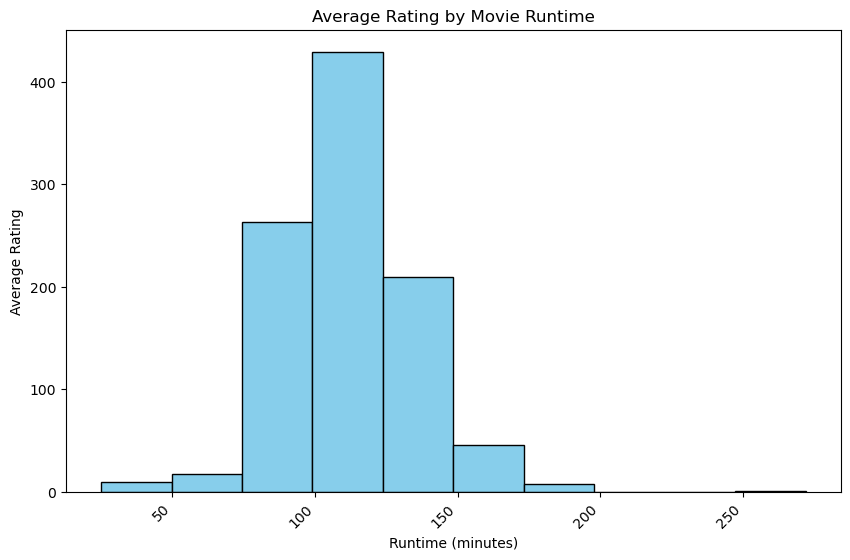

In [64]:
# Plot a bar graph
plt.figure(figsize=(10, 6))
plt.hist(imbDataNew['runtime_minutes'], color='skyblue', edgecolor='black')
plt.title('Average Rating by Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## **Conclusions**
`Genre`

Adventure genre is the most profitable.

`Movie Lenght`
Movie lenght of 90 minutes is liked by audience.

## **Recommendation**

It is recommended for Microsoft movie studio to produce more adventure genre films.

It is recommended for microsoft movie studio to produce films of 90 minutes long.



